<a href="https://colab.research.google.com/github/nhrishi/1.1.0-experimental_bin/blob/master/TradingIntel_v0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import relu, tanh, sigmoid

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import json as json

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

#pip install fyers_apiv3

In [55]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=fab51b9e9decfd0a05c14712bd10ffd39ba12b949fba7dcb1ae8802f1b0a08cf
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [2]:
pip install fyers_apiv3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.8.0
    Uninstalling websocket-client-1.8.0:
      Successfully uninstalled websocket-client-1.8.0
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.9.5
    Uninstalling aiohttp-3.9.5:
      Successfully uninstalled aiohttp-3.9.5


In [187]:
from fyers_apiv3 import fyersModel

client_id = "Q9Y3IP8H5W-100"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTcwNzk5MzEsImV4cCI6MTcxNzExNTQ1MSwibmJmIjoxNzE3MDc5OTMxLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVdJOTdrQ19seDQzZEM4S1FhMGlRQ3pFNjg1Ti1rYlZiN3ROQ3E2QU1ubU95eU9kcUFaQms2ZzJNalhFQXFQWkpYeS1fMnJlSXhycWF4eWw4RklwcFNNc3BmclNhdHhMSHB6Z1p5MERIRV94Qk1Qaz0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIzMDI1Y2IzMjkxYWEzYTcyMzM3MWIyYzkxOGU4YTc5ZDFkZDk5ODlmMmI3NjcwY2ViZGZkNjQyNiIsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.6iCpNueqfkemVbnVBfC_N6vVbMoZM2mxiDCO9mnfCzA"
access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTcyMjAzODEsImV4cCI6MTcxNzI4ODI0MSwibmJmIjoxNzE3MjIwMzgxLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVdyUWR2amNWcDBuWjVORGF1UHJHal9FRy1NODQ0U0RORWJ5b3ViUGhVWEoyamRhLXNKbkFMMjF3VEE5aWJCUDZPQzRQTkVmMGs1NmlSUU9yR0phME9ldC10YU8zMGxQVFVXV21BMkc3czlGOXZnST0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIzMDI1Y2IzMjkxYWEzYTcyMzM3MWIyYzkxOGU4YTc5ZDFkZDk5ODlmMmI3NjcwY2ViZGZkNjQyNiIsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.i0XMeuNysywDHYfM7IhX892O6GjznBWtBB-M0FrLMVU"
# Initialize the FyersModel instance with your client_id, access_token, and enable async mode
fyers = fyersModel.FyersModel(client_id=client_id, is_async=False, token=access_token, log_path="")

#yyyy-mm-dd
#Daily data Extraction
# daily_data = {
#     "symbol":"NSE:SBIN-EQ",
#     "resolution":"D",
#     "date_format":"1",
#     "range_from":"2023-05-30",
#     "range_to":"2024-05-30",
#     "cont_flag":"1"
# }
daily_data = {
    "symbol":"MCX:CRUDEOIL24JUNFUT",
    "resolution":"D",
    "date_format":"1",
    "range_from":"2023-05-30",
    "range_to":"2024-05-30",
    "cont_flag":"1"
}


response = fyers.history(data=daily_data)
print(response)
daily_data_json = json.dumps(response)
daily_data_df = json.loads(daily_data_json)
print(daily_data_df['candles'])
pricing_daily_data = daily_data_df['candles']
daily_df = pd.DataFrame(pricing_daily_data)
daily_df.columns = ["epoch", "open", "high", "low", "close", "volume"]


# #hourly data Extraction
# hourly_data = {
#     "symbol":"NSE:SBIN-EQ",
#     "resolution":"60",
#     "date_format":"1",
#     "range_from":"2024-03-01",
#     "range_to":"2024-05-29",
#     "cont_flag":"1"
# }

# response = fyers.history(data=hourly_data)
# print(response)
# hourly_data_json = json.dumps(response)
# hourly_data_df = json.loads(hourly_data_json)
# print(hourly_data_df['candles'])
# pricing_hourly_data = hourly_data_df['candles']
# hourly_df = pd.DataFrame(pricing_hourly_data)
# hourly_df.columns = ["epoch", "open", "high", "low", "close", "volume"]


import datetime
daily_df['date'] = pd.to_datetime(daily_df['epoch'], unit='s').dt.strftime('%Y-%m-%d')
print(daily_df)

# hourly_df['date'] = pd.to_datetime(hourly_df['epoch'], unit='s').dt.strftime('%Y-%m-%d')
# print(hourly_df)


{'candles': [[1685404800, 6004, 6021, 5734, 5756, 49254], [1685491200, 5755, 5779, 5567, 5690, 47668], [1685577600, 5683, 5861, 5589, 5828, 51730], [1685664000, 5817, 5952, 5804, 5916, 34167], [1685923200, 5957, 6107, 5957, 6004, 49074], [1686009600, 5955, 5978, 5811, 5939, 53573], [1686096000, 5918, 6046, 5871, 6004, 44920], [1686182400, 5986, 6053, 5714, 5903, 99890], [1686268800, 5863, 5926, 5809, 5824, 44618], [1686528000, 5750, 5750, 5524, 5569, 67050], [1686614400, 5575, 5754, 5549, 5729, 50781], [1686700800, 5722, 5789, 5630, 5664, 32357], [1686787200, 5609, 5814, 5592, 5796, 12902], [1686873600, 5814, 5884, 5775, 5877, 22585], [1687132800, 5834, 5938, 5830, 5865, 17072], [1687219200, 5853, 5955, 5747, 5821, 35024], [1687305600, 5835, 5975, 5827, 5953, 28408], [1687392000, 5940, 5966, 5675, 5705, 47042], [1687478400, 5678, 5690, 5546, 5675, 36092], [1687737600, 5686, 5760, 5654, 5737, 31085], [1687824000, 5744, 5766, 5582, 5617, 52225], [1687910400, 5615, 5737, 5529, 5726, 54201

In [ ]:
#hourly_df.set_index('date', inplace=True)
#daily_df.set_index('date', inplace=True)

In [188]:
# Moving Average 20
#daily_df['MA_20'] = daily_df['close'].rolling(window=20).mean()
#daily_df.dropna(inplace=True)
#print(daily_df)

daily_df['DAILY_RSI']=ta.rsi(daily_df.close, length=15)
daily_df['DAILY_EMA5']=ta.ema(daily_df.close, length=5)
daily_df['DAILY_EMA12']=ta.ema(daily_df.close, length=12)
daily_df['DAILY_EMA13']=ta.ema(daily_df.close, length=13)
daily_df['DAILY_EMA26']=ta.ema(daily_df.close, length=26)
daily_df['DAILY_EMA50']=ta.ema(daily_df.close, length=50)
# daily_df['MACD_TA'], daily_df['histogram'], daily_df['signal']=ta.macd(daily_df.close, fast=12, slow=26, signal=9)


####### Daily MACD calculations ######
# # Calculate the 5-period EMA Daily
# daily_df['DAILY_EMA5'] = daily_df['close'].ewm(span=5, adjust=False).mean()

# # Calculate the 13-period EMA Daily
# daily_df['DAILY_EMA13'] = daily_df['close'].ewm(span=13, adjust=False).mean()

# # Calculate the 12-period EMA Daily
# daily_df['DAILY_EMA12'] = daily_df['close'].ewm(span=12, adjust=False).mean()

# # Calculate the 26-period EMA Daily
# daily_df['DAILY_EMA26'] = daily_df['close'].ewm(span=26, adjust=False).mean()

# # Calculate the 50-period EMA Daily
# daily_df['DAILY_EMA50'] = daily_df['close'].ewm(span=50, adjust=False).mean()

# # Calculate the 100-period EMA Daily
# daily_df['DAILY_EMA100'] = daily_df['close'].ewm(span=100, adjust=False).mean()

# Calculate MACD (the difference between 12-period EMA and 26-period EMA)
daily_df['DAILY_MACD'] = daily_df['DAILY_EMA12'] - daily_df['DAILY_EMA26']

# Calculate the 9-period EMA of MACD (Signal Line)
daily_df['DAILY_SIGNAL'] = daily_df['DAILY_MACD'].ewm(span=9, adjust=False).mean()

## Target calculation
daily_df['Target'] = daily_df['close']-daily_df.open
daily_df['Target'] = daily_df['Target'].shift(-1)

daily_df['TargetClass'] = [1 if daily_df.Target[i]>0 else 0 for i in range(len(daily_df))]

daily_df['TargetNextClose'] = daily_df['close'].shift(-1)

##ADX
adx_df = daily_df.ta.adx(high=daily_df['high'], low=daily_df['low'], close=daily_df['close']);
daily_df = pd.concat([daily_df, adx_df], axis=1)

##BB
bb_df = ta.bbands(daily_df.close, length=20, std=2).iloc[:, :3]
daily_df = pd.concat([daily_df, bb_df], axis=1)


#### Drop rows with NaN values created by indicators calculation

daily_df.dropna(inplace=True)
# hourly_df.dropna(inplace=True)
# daily_df.reset_index(inplace = True)

print(daily_df.shape)
# print(hourly_df.shape)

(209, 24)


In [189]:
# print(daily_df.shape)
# print(len(daily_df))
print(daily_df)

# print(hourly_df.shape)

          epoch  open  high   low  close  volume        date  DAILY_RSI  \
49   1691366400  6839  6852  6750   6806   15077  2023-08-07  68.835691   
50   1691452800  6800  6851  6629   6840   29085  2023-08-08  69.694675   
51   1691539200  6850  7009  6845   6929   34012  2023-08-09  71.869292   
52   1691625600  6973  7028  6848   6873   22564  2023-08-10  68.553009   
53   1691712000  6862  6946  6814   6934   21666  2023-08-11  70.159995   
..          ...   ...   ...   ...    ...     ...         ...        ...   
253  1716422400  6455  6556  6388   6397   18004  2024-05-23  34.260301   
254  1716508800  6414  6480  6345   6471   16280  2024-05-24  39.508656   
255  1716768000  6490  6565  6469   6547   10132  2024-05-27  44.393659   
256  1716854400  6559  6650  6546   6637   12347  2024-05-28  49.561682   
257  1716940800  6654  6728  6607   6624   12286  2024-05-29  48.858920   

      DAILY_EMA5  DAILY_EMA12  ...  DAILY_SIGNAL  Target  TargetClass  \
49   6749.558505  6607.586

In [190]:
# Normalize features
scaler = MinMaxScaler()
#scaled_data = scaler.fit_transform(combined_df[['close', 'DAILY_MACD', 'DAILY_RSI', 'DAILY_SIGNAL', 'volume', 'HOURLY_RSI_max', 'HOURLY_RSI_min', 'DAILY_EMA5', 'DAILY_EMA13', 'DAILY_EMA26', 'HOURLY_EMA5_mean', 'HOURLY_EMA13_mean', 'HOURLY_EMA26_mean' ]])
scaled_data = scaler.fit_transform(daily_df[['close', 'DAILY_MACD', 'DAILY_RSI', 'DAILY_SIGNAL', 'volume', 'DAILY_EMA5', 'DAILY_EMA13', 'DAILY_EMA26', 'DAILY_EMA50', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'Target', 'TargetClass', 'TargetNextClose', 'ADX_14' ]])

#print(scaled_data)

In [191]:
print(scaled_data.shape)

(209, 16)


In [192]:
# Create sequences for LSTM model
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length, 0])  # Assuming 'Close' is the first column
    return np.array(sequences), np.array(labels)


# If the input data is not a 2D array, reshape it
if len(scaled_data.shape) != 2:
    scaled_data = scaled_data.reshape(-1, 1)

SEQ_LENGTH = 5  # 60 days sequence
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [193]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(163, 5, 16)
(163,)
(41, 5, 16)
(41,)


In [ ]:
# if len(X_train.shape) == 3:
#     X_train = np.expand_dims(X_train, axis=2)

In [194]:
model = Sequential([
    LSTM(150, activation='tanh', return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])),
    Dropout(0.2),
    LSTM(150, activation='tanh',return_sequences=True),
    Dropout(0.2),
    LSTM(150, activation='tanh'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/50
6/6 [==============================] - 7s 273ms/step - loss: 0.1135 - val_loss: 0.0509
Epoch 2/50
6/6 [==============================] - 0s 34ms/step - loss: 0.0250 - val_loss: 0.0276
Epoch 3/50
6/6 [==============================] - 0s 35ms/step - loss: 0.0200 - val_loss: 0.0185
Epoch 4/50
6/6 [==============================] - 0s 37ms/step - loss: 0.0180 - val_loss: 0.0064
Epoch 5/50
6/6 [==============================] - 0s 36ms/step - loss: 0.0136 - val_loss: 0.0047
Epoch 6/50
6/6 [==============================] - 0s 33ms/step - loss: 0.0088 - val_loss: 0.0056
Epoch 7/50
6/6 [==============================] - 0s 35ms/step - loss: 0.0102 - val_loss: 0.0048
Epoch 8/50
6/6 [==============================] - 0s 36ms/step - loss: 0.0100 - val_loss: 0.0046
Epoch 9/50
6/6 [==============================] - 0s 36ms/step - loss: 0.0091 - val_loss: 0.0052
Epoch 10/50
6/6 [==============================] - 0s 38ms/step - loss: 0.0107 - val_loss: 0.0037
Epoch 11/50
6/6 [===========

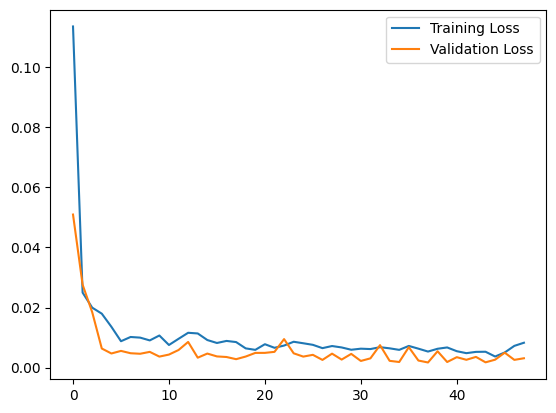

2/2 [==============================] - 1s 15ms/step


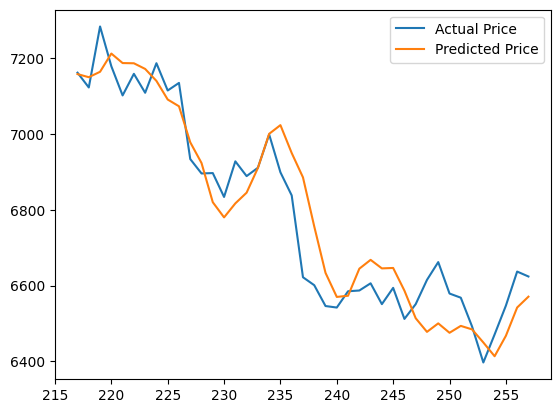

[7158.28396362 7150.07893276 7164.42230773 7212.51191926 7187.42956501
 7186.84344721 7171.95934486 7140.31937253 7091.19864386 7073.33485168
 6978.30337566 6923.57068342 6820.0416742  6780.00682276 6816.98023212
 6845.25908661 6910.40510964 7000.58314931 7023.59337491 6949.96441287
 6885.66905838 6756.13986832 6633.58014953 6570.03583965 6573.21236563
 6644.58182436 6667.91194734 6645.38221714 6646.50900048 6586.63228658
 6513.78881392 6477.79383418 6500.22678506 6475.40131342 6493.61709785
 6484.31793508 6449.79165104 6413.47213593 6467.37098005 6542.1123786
 6570.71032655]


In [195]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(np.concatenate([predicted_prices, np.zeros((predicted_prices.shape[0], X_test.shape[2] - 1))], axis=1))[:, 0]

# Plot predicted vs actual prices
plt.plot(daily_df.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2] - 1))], axis=1))[:, 0], label='Actual Price')
plt.plot(daily_df.index[-len(y_test):], predicted_prices, label='Predicted Price')
plt.legend()
plt.show()

print(predicted_prices)


In [162]:
help(ta.adx)

Help on function adx in module pandas_ta.trend.adx:

adx(high, low, close, length=None, lensig=None, scalar=None, mamode=None, drift=None, offset=None, **kwargs)
    Average Directional Movement (ADX)
    
    Average Directional Movement is meant to quantify trend strength by measuring
    the amount of movement in a single direction.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/average-directional-movement-adx/
        TA Lib Correlation: >99%
    
    Calculation:
        DMI ADX TREND 2.0 by @TraderR0BERT, NETWORTHIE.COM
            //Created by @TraderR0BERT, NETWORTHIE.COM, last updated 01/26/2016
            //DMI Indicator
            //Resolution input option for higher/lower time frames
            study(title="DMI ADX TREND 2.0", shorttitle="ADX TREND 2.0")
    
            adxlen = input(14, title="ADX Smoothing")
            dilen = input(14, title="DI Length")
            thold = input(20, title="Threshold")
  

In [164]:
#data = daily_df.ta.adx(high=daily_df['high'], low=daily_df['low'], close=daily_df['close']);

In [167]:
# print(data.shape)
# print(data)

(209, 3)
        ADX_14     DMP_14     DMN_14
49         NaN        NaN        NaN
50         NaN        NaN        NaN
51         NaN        NaN        NaN
52         NaN        NaN        NaN
53         NaN        NaN        NaN
..         ...        ...        ...
253  25.679009  13.137677  29.853404
254  26.859652  12.190685  29.997456
255  26.901343  16.184878  28.428182
256  26.024587  19.955197  26.792941
257  24.470301  22.947320  24.991726

[209 rows x 3 columns]


In [185]:
# data = ta.bbands(daily_df.close, length=20, std=2).iloc[:, :3]
dat1 = ta.bbands(daily_df.close, length=20, std=2)

help(ta.bbands)


Help on function bbands in module pandas_ta.volatility.bbands:

bbands(close, length=None, std=None, ddof=0, mamode=None, talib=None, offset=None, **kwargs)
    Bollinger Bands (BBANDS)
    
    A popular volatility indicator by John Bollinger.
    
    Sources:
        https://www.tradingview.com/wiki/Bollinger_Bands_(BB)
    
    Calculation:
        Default Inputs:
            length=5, std=2, mamode="sma", ddof=0
        EMA = Exponential Moving Average
        SMA = Simple Moving Average
        STDEV = Standard Deviation
        stdev = STDEV(close, length, ddof)
        if "ema":
            MID = EMA(close, length)
        else:
            MID = SMA(close, length)
    
        LOWER = MID - std * stdev
        UPPER = MID + std * stdev
    
        BANDWIDTH = 100 * (UPPER - LOWER) / MID
        PERCENT = (close - LOWER) / (UPPER - LOWER)
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): The short period. Default: 5
        std (int): The long 

In [184]:
print(dat1)

      BBL_20_2.0  BBM_20_2.0   BBU_20_2.0  BBB_20_2.0  BBP_20_2.0
49           NaN         NaN          NaN         NaN         NaN
50           NaN         NaN          NaN         NaN         NaN
51           NaN         NaN          NaN         NaN         NaN
52           NaN         NaN          NaN         NaN         NaN
53           NaN         NaN          NaN         NaN         NaN
..           ...         ...          ...         ...         ...
253  6342.547675     6617.30  6892.052325    8.304061    0.099093
254  6372.170121     6590.90  6809.629879    6.637330    0.225918
255  6405.955923     6573.30  6740.644077    5.091631    0.421419
256  6443.256875     6563.25  6683.243125    3.656515    0.807309
257  6443.158029     6563.35  6683.541971    3.662519    0.752305

[209 rows x 5 columns]
